[codebasics](https://www.youtube.com/watch?v=zM4VZR0px8E&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=9&t=192s)

In [1]:
%matplotlib inline

(27, 2)
   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


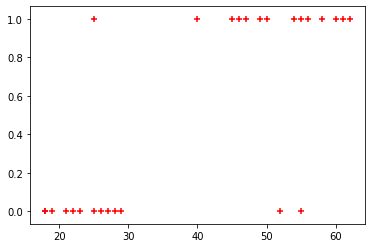

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("insurance_data.csv")
print(df.shape)
print(df.head())

plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

if 1:
    x_train, x_test, y_train, y_test = train_test_split(
        df[['age']], 
        df.bought_insurance, 
        train_size=0.9
    )
elif 0:
    x_train, x_test, y_train, y_test = train_test_split(
        df[['age']], 
        df['bought_insurance'], 
        train_size=0.9
    )
elif 1:
    x_train, x_test, y_train, y_test = train_test_split(
        df[['age']], 
        df[['bought_insurance']], 
        train_size=0.9
    )

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24, 1) (3, 1) (24,) (3,)


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)
print(x_test)
print(y_test)
print(y_pred)
print(y_pred_prob)

# print(x_test.age.shape) 
# print(y_test.shape) 
# print(y_test.shape) 
# print(y_pred_prob[:,0].shape) 
# print(y_pred_prob[:,1].shape) 

df_test = pd.DataFrame({
    'age': x_test.age, 
    'bought_insurance': y_test, 
    'bought_insurance_pred': y_pred, 
    'prob_0': y_pred_prob[:,0], 
    'prob_1': y_pred_prob[:,1]
    })

print(df_test)
print(model.score(x_test,y_test))

    age
19   18
14   49
7    60
19    0
14    1
7     1
Name: bought_insurance, dtype: int64
[0 1 1]
[[0.93756847 0.06243153]
 [0.227416   0.772584  ]
 [0.06797313 0.93202687]]
    age  bought_insurance  bought_insurance_pred    prob_0    prob_1
19   18                 0                      0  0.937568  0.062432
14   49                 1                      1  0.227416  0.772584
7    60                 1                      1  0.067973  0.932027
1.0


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model